In [1]:
from keras.models import load_model # 학습된 모델을 불러와서 사용하기 위해
import glob # 폴더의 모든 하위폴더까지 탐색해서 확장자가 jpg인 파일 가져오기 위해 사용
from matplotlib import pyplot as plt #데이터를 차트나 플롯(Plot)으로 그려주는 라이브러리 패키지로 그림을 표시하기 위해 사용
import cv2    # 얼굴 검출, 라벨링 등 용도
import numpy as np  # 계산을 위해 행렬과 같은 다양한 수학 도구를 사용하기 위한 라이브러리

Using TensorFlow backend.


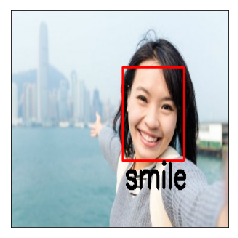

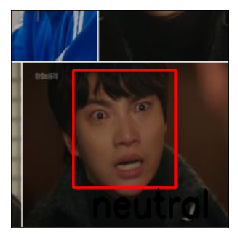

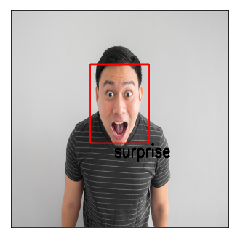

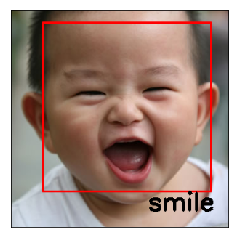

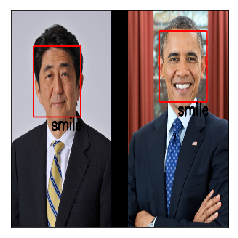

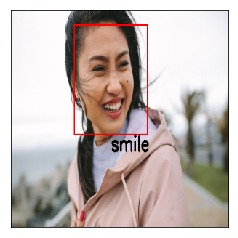

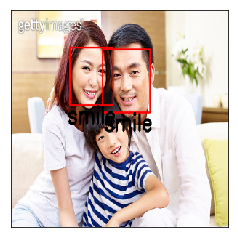

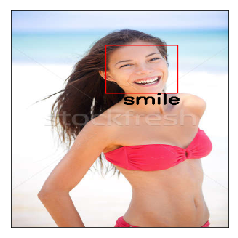

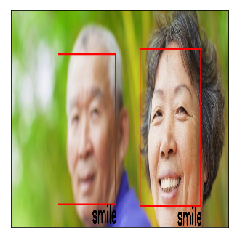

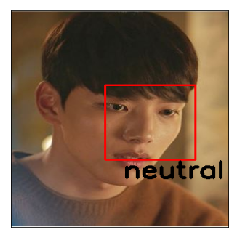

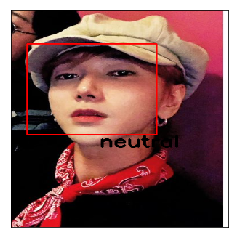

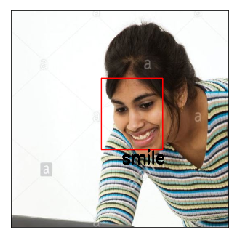

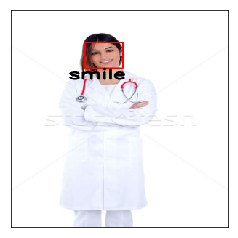

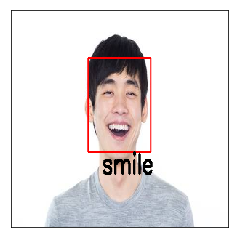

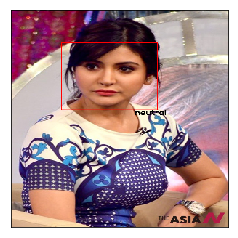

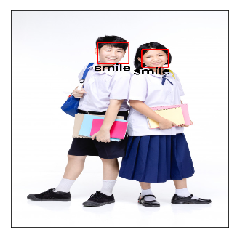

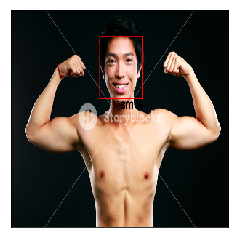

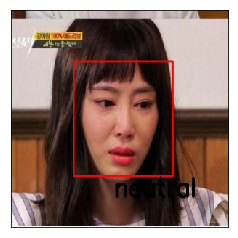

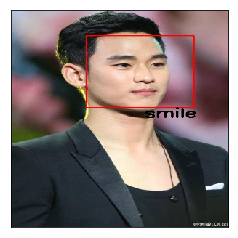

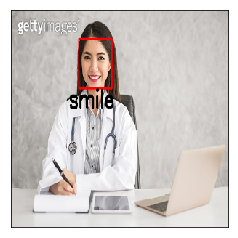

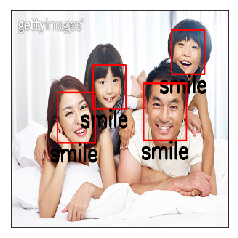

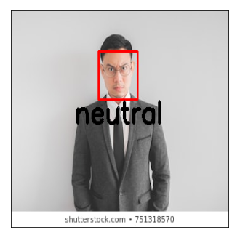

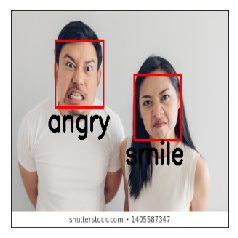

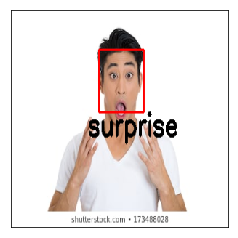

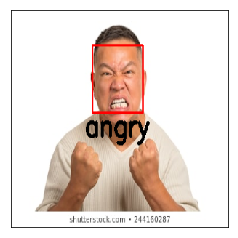

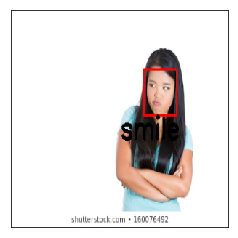

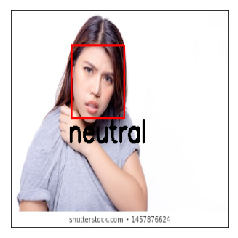

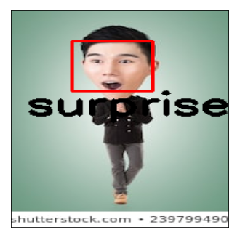

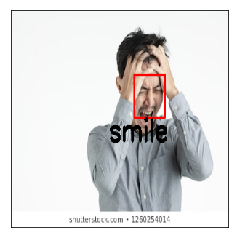

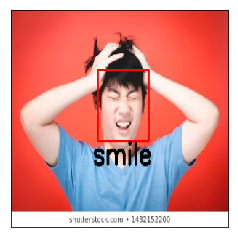

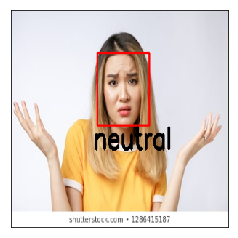

In [5]:
caltech_dir = "dataset/test/" # 테스트 데이터 폴더 경로
files = glob.glob(caltech_dir+"/*.jpg") # 테스트할 사진 파일들 전체 가져오기
global answer # 테스트 결과 리스트
answer=[]

# 학습된 모델 불러오기
model = load_model('model/68.8_model.h5')

# 테스트 이미지 하나씩 가져오기
for i, f in enumerate(files): 
    
#   openCV를 통하여 이미지 가져오기
    view_img = cv2.imread(f)
    
#   matplotlib으로 화면에 컬러로 출력하기 위해.
#   openCV의 BGR을 RGB로 바꾸어 줍니다.
    view_img = cv2.cvtColor(view_img, cv2.COLOR_BGR2RGB)

# 사진에서 얼굴을 추출한 뒤
# 추출된 얼굴에서 예측을 합니다.
    emotion_recognition(view_img)

# 테스트 결과 출력 함수    
resultPrint()

In [2]:
# 테스트 결과 출력 함수
def resultPrint():
    global answer # 테스트 결과 리스트
    for img in answer:
        plt.imshow(img) # 이미지 표시
        plt.xticks([]) # x축 숫자표시 안하기
        plt.yticks([]) # y축 숫자표시 안하기
        plt.show()  # 화면에 표시

In [3]:
# 사진에서 얼굴을 추출한 뒤 검출된 얼굴에서 예측을 합니다.
def emotion_recognition(img):
    global answer  # 테스트 결과 리스트
    
#   얼굴을 검출하기 위해 Haar-cascade의 XML 포맷으로 저장된 분류기를 로드합니다. 
#   흑백 사진에서 수직, 수평에서의 명암차이로 특징을 찾아내어 얼굴을 찾아냅니다
    face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') 
    
    #얼굴 검출을 위해 GRAY로 변환하여 input으로 넣어줍니다.
    faces = face_classifier.detectMultiScale( cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  ,1.3,5)
    
    #검출된 얼굴이 없으면 None으로 리턴 
    if faces is():
        return None
    
    # 검출된 얼굴이 있으면
    for(x,y,w,h) in faces:
        # 검출된 얼굴의 크기만큼 crop
        cropped_face = img[y:y+h, x:x+w]                  
        cropped_face = cv2.resize(cropped_face,(48,48))   
        
        # 검출된 얼굴영역에 사각형을 그려줍니다.
        cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), thickness=2) 
        
        # 검출된 얼굴을 model에 input 값으로 넣어 예측을 한 뒤 결과 값을 받아옵니다.
        label= model_predict(cv2.cvtColor(cropped_face, cv2.COLOR_BGR2GRAY))  
        
        # 예측한 결과 값을 label로 입력합니다.
        cv2.putText(img, label, (x+w-100, y+h+30), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0,0,0), 3)
    
    # 예측된 결과 사진을 크기 조정
    img = cv2.resize(img,(300, 300))
    # 예측된 결과 사진을 리스트에 담아줍니다.
    answer.append(img)

In [4]:
# 검출된 얼굴을 보고 감정을 예측하는 함수
def model_predict(img):

    # 예측 카테고리
    categories = ["neutral","angry","surprise","smile","sad"]
    
    # input 행렬 크기 조정
    img = img.reshape(-1,48,48,1)
    
    # 모델 예측
    predict = model.predict(img)
    
    # 예측값 중 가장 높은 확률의 카테고리를 반환
    return categories[np.argmax(predict)]